In [2]:
import cv2


top_left_corner = []
bottom_right_corner = []

def drawRectangle(action, x, y, flags, parms):
    global top_left_corner, bottom_right_corner
    if action == cv2.EVENT_LBUTTONDOWN:
        top_left_corner = [(x, y)]
    elif action == cv2.EVENT_LBUTTONUP:
        bottom_right_corner = [(x, y)]
        cv2.rectangle(image, top_left_corner[0], bottom_right_corner[0], (0, 255, 0),5)
        cv2.imshow("Window", image)

image = cv2.imread("./img01.jpg")
temp = image.copy()
cv2.namedWindow("Window")
cv2.setMouseCallback("Window", drawRectangle)

k = 0
while k != 113:
    cv2.imshow("Window", image)
    k = cv2.waitKey(0)
    if (k == 99):
        image = temp.copy()
        cv2.imshow("Window", image)

cv2.destroyAllWindows()

array([[[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.9019608 , 0.5803922 , 0.47843137],
        [0.8666667 , 0.50980395, 0.43137255],
        [0.78431374, 0.3882353 , 0.3529412 ]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.9019608 , 0.5803922 , 0.47843137],
        [0.8666667 , 0.50980395, 0.43137255],
        [0.78431374, 0.3882353 , 0.3529412 ]],

       [[0.8862745 , 0.5372549 , 0.49019608],
        [0.8862745 , 0.5372549 , 0.49019608],
        [0.8745098 , 0.5372549 , 0.52156866],
        ...,
        [0.9019608 , 0.5803922 , 0.47843137],
        [0.8666667 , 0.50980395, 0.43137255],
        [0.78431374, 0.3882353 , 0.3529412 ]],

       ...,

       [[0.32941177, 0.07058824, 0.23529412],
        [0.32941177, 0.07058824, 0.23529412],
        [0.36078432, 0

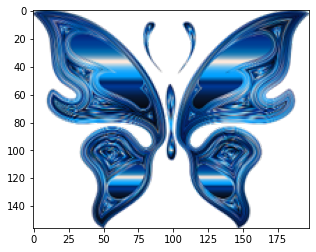

In [32]:
import matplotlib.pyplot as plt


img=plt.imread('./lenna.jpg')
img2=plt.imread('./nabi.png')
plt.imshow(img2)

tmp=img[:2,:3]
tmp[:,:]=[0,0,0]


img

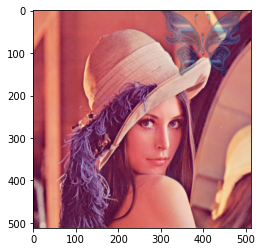

In [52]:
import matplotlib.pyplot as plt


img=plt.imread('./lenna.jpg')
img2=plt.imread('./nabi.png')
plt.imshow(img2)

w=img2.shape[1]
h=img2.shape[0]

mask_img=img2[:,:,3] * 0.4
for c in range(3):
    img[0:0+h,300:300+w,c]=(img2[:,:,c]*mask_img)+(img[0:0+h,300:300+w,c]*(1-mask_img))

plt.imshow(img)



# tmp=img[0:0+h,300:300+w]
# tmp
# for c in range(3):
#     tmp[:,:,c]=(tmp[:,:,c]*mask_img)+(tmp[:,:,c]*(1-mask_img))

# plt.imshow(img)

# print(img[0:0+h,300:300+w])
# print('-----------------------------------------------')
# print(tmp)
# tmp[:,:,0]=0
# print('-----------------------------------------------')
# print(tmp)
# print('-----------------------------------------------')
# print(img)

In [62]:
import cv2
import numpy as np


top_left_corner = []
bottom_right_corner = []
top = []
bottom = []

def drawRectangle(action, x, y, flags, parms):
    global top_left_corner, bottom_right_corner, target_area, top, bottom, image
    if action == cv2.EVENT_LBUTTONDOWN:
        top_left_corner = [(x, y)]
        top = (x,y)
    elif action == cv2.EVENT_LBUTTONUP:
        bottom_right_corner = [(x, y)]
        bottom = (x,y)
        cv2.rectangle(image, top_left_corner[0], bottom_right_corner[0], (0, 255, 0),5)
        
        # 사각형 안에 나비 그리기
        if top_left_corner[0][0] < bottom_right_corner[0][0]:
            tmp_x = (top_left_corner[0][0], bottom_right_corner[0][0])
        else:
            tmp_x = (bottom_right_corner[0][0], top_left_corner[0][0])
            
        if top_left_corner[0][1] < bottom_right_corner[0][1]:
            tmp_y = (top_left_corner[0][1], bottom_right_corner[0][1])
        else:
            tmp_y = (bottom_right_corner[0][1], top_left_corner[0][1])
            
        top_left_corner = [(tmp_x[0], tmp_y[0])]
        bottom_right_corner = [(tmp_x[1], tmp_y[1])]
        w = bottom_right_corner[0][0] - top_left_corner[0][0]
        h = bottom_right_corner[0][1] - top_left_corner[0][1]
        img_bf_resize = cv2.resize(img_bf,(w,h))
        mask = img_bf_resize[:,:,3] / 255
        
        w = abs(bottom[0]-top[0])
        h = abs(bottom[1]-top[1])
        tmp = cv2.resize(img_bf,(w,h))
        mask_img = tmp[:,:,3] / 255

        for c in range(3):
            target_area = image[top_left_corner[0][1]:bottom_right_corner[0][1], top_left_corner[0][0]:bottom_right_corner[0][0], c]
            img_sum1 = target_area * (1-mask)
#             img_sum1 = img_sum1.astype(np.uint8)
            img_sum2 = img_bf_resize[:,:,c] * mask
#             img_sum2 = img_sum2.astype(np.uint8)
#             target_area = img_sum1 + img_sum2
            image[top_left_corner[0][1]:bottom_right_corner[0][1], top_left_corner[0][0]:bottom_right_corner[0][0], c] = (img_sum1 + img_sum2).astype(np.uint8)
#             image[top[1]:bottom[1],top[0]:bottom[0],c]=((tmp[:,:,c]*mask_img)+(image[top[1]:bottom[1],top[0]:bottom[0],c]*(1-mask_img))).astype(np.uint8)

        
        cv2.imshow("Window", image)

image = cv2.imread("./img01.jpg")
temp = image.copy()

img_bf = cv2.imread('./nabi.png', cv2.IMREAD_UNCHANGED)

cv2.namedWindow("Window")
cv2.setMouseCallback("Window", drawRectangle)

k = 0
while k != 113:
    cv2.imshow("Window", image)
    k = cv2.waitKey(0)
    if (k == 99):
        image = temp.copy()
        cv2.imshow("Window", image)

cv2.destroyAllWindows()

In [9]:
img_bf = cv2.imread('./나비.png')

In [11]:
type(img_bf)

NoneType

In [5]:
import cv2
import numpy as np

In [11]:
img_bf = cv2.imread('./nabi.png', cv2.IMREAD_UNCHANGED)
img_bf_resize = cv2.resize(img_bf,(200,200))
mask = img_bf_resize[:,:,3] / 255

for c in range(3):
    img_sum2 = img_bf_resize[:,:,c] * mask
    img_res = img_sum2.astype(np.uint8)
    cv2.imshow(str(c), img_res)
    # print(img_res)
    
# cv2.imshow("Window", img_bf_resize)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [20]:
img_bf.shape

(156, 198, 4)

In [21]:
img_bf[:,:,3]

array([[  0,   1,  38, ...,  38,   1,   0],
       [ 18, 145, 230, ..., 230, 145,  18],
       [178, 255, 255, ..., 255, 255, 178],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

In [23]:
mask = img_bf[:,:,3] / 255

In [24]:
mask

array([[0.        , 0.00392157, 0.14901961, ..., 0.14901961, 0.00392157,
        0.        ],
       [0.07058824, 0.56862745, 0.90196078, ..., 0.90196078, 0.56862745,
        0.07058824],
       [0.69803922, 1.        , 1.        , ..., 1.        , 1.        ,
        0.69803922],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [1]:
import cv2
import numpy as np
 
src1 = cv2.imread('./img01.jpg') #사과파일 읽기
src2 = cv2.imread('./nabi.png', cv2.IMREAD_UNCHANGED) #로고파일 읽기
 
rows, cols, channels = src2.shape #로고파일 픽셀값 저장
roi = src1[50:rows+50,50:cols+50] #로고파일 필셀값을 관심영역(ROI)으로 저장함.
 
gray = cv2.cvtColor(src2, cv2.COLOR_BGR2GRAY) #로고파일의 색상을 그레이로 변경
ret, mask = cv2.threshold(gray, 160, 255, cv2.THRESH_BINARY) #배경은 흰색으로, 그림을 검정색으로 변경
mask_inv = cv2.bitwise_not(mask)
# cv2.imshow('mask',mask) #배경 흰색, 로고 검정
# cv2.imshow('mask_inv',mask_inv) # 배경 검정, 로고 흰색
 
src1_bg = cv2.bitwise_and(roi,roi,mask=mask) #배경에서만 연산 = src1 배경 복사
# cv2.imshow('src1_bg',src1_bg)
 
src2_fg = cv2.bitwise_and(src2,src2, mask = mask_inv) #로고에서만 연산
# cv2.imshow('src2_fg',src2_fg)
 
dst = cv2.bitwise_or(src1_bg, src2_fg) #src1_bg와 src2_fg를 합성
# cv2.imshow('dst',dst)
 
src1[50:rows+50,50:cols+50] = dst #src1에 dst값 합성
 
cv2.imshow('result',src1)
cv2.waitKey(0)
cv2.destroyAllWindows()


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\core\src\arithm.cpp:214: error: (-209:Sizes of input arguments do not match) The operation is neither 'array op array' (where arrays have the same size and type), nor 'array op scalar', nor 'scalar op array' in function 'cv::binary_op'


In [5]:
import cv2 as cv
import numpy as np

logo = cv.imread("./nabi.png", cv.IMREAD_COLOR)
background = cv.imread("./img01.jpg", cv.IMREAD_COLOR)

logo_gray = cv.cvtColor(logo, cv.COLOR_BGR2GRAY)
ret, logo_mask = cv.threshold(logo_gray, 240, 255, cv.THRESH_BINARY)

logo_mask_inv = cv.bitwise_not(logo_mask)


# 넣고 싶은 위치에 합성할 이미지의 크기만큼 배경 이미지를 잘라냄
height, width = logo_gray.shape[:2]
background_cut = background[0:height, 0:width]

# 배경 이미지에는 로고 들어갈 위치 삭제
# 로고에는 로고만 냄기고 배경 삭제
img1 = cv.bitwise_and(logo, logo, mask=logo_mask_inv)
img2 = cv.bitwise_and(background_cut, background_cut, mask=logo_mask)

tmp = cv.add(img1, img2)
background[0:height, 0:width] = tmp

cv.imshow("A", background)

cv.waitKey(0)

113